In [ ]:
#
# First look at the historical airplane crash and fatalities since 1908:
# https://opendata.socrata.com/Government/Airplane-Crashes-and-Fatalities-Since-1908/q2te-8cvq
#

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import prettyplotlib as pplt
import seaborn as sns
from scipy import stats

sns.set(style="whitegrid")

frame=pd.read_csv('./Airplane_Crashes_and_Fatalities_Since_1908.csv',sep=',')
frame.head(10)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
5,03/05/1915,01:00,"Tienen, Belgium",Military - German Navy,NaN,NaN,Zeppelin L-8 (airship),NaN,NaN,41.0,21.0,0.0,Crashed into trees while attempting to land af...
6,09/03/1915,15:20,"Off Cuxhaven, Germany",Military - German Navy,NaN,NaN,Zeppelin L-10 (airship),NaN,NaN,19.0,19.0,0.0,"Exploded and burned near Neuwerk Island, when..."
7,07/28/1916,NaN,"Near Jambol, Bulgeria",Military - German Army,NaN,NaN,Schutte-Lanz S-L-10 (airship),NaN,NaN,20.0,20.0,0.0,"Crashed near the Black Sea, cause unknown."
8,09/24/1916,01:00,"Billericay, England",Military - German Navy,NaN,NaN,Zeppelin L-32 (airship),NaN,NaN,22.0,22.0,0.0,Shot down by British aircraft crashing in flames.
9,10/01/1916,23:45,"Potters Bar, England",Military - German Navy,NaN,NaN,Zeppelin L-31 (airship),NaN,NaN,19.0,19.0,0.0,Shot down in flames by the British 39th Home D...


In [ ]:
#
# So lets have a first look at the data.  The number of crashes and fatalities per year are a good place to start.
# First, add a couple of more useful columns
#

In [2]:
frame['Year'] = frame['Date'].apply(lambda x: int(str(x)[-4:]))
frame['FatalRate'] = frame.Fatalities / frame.Aboard

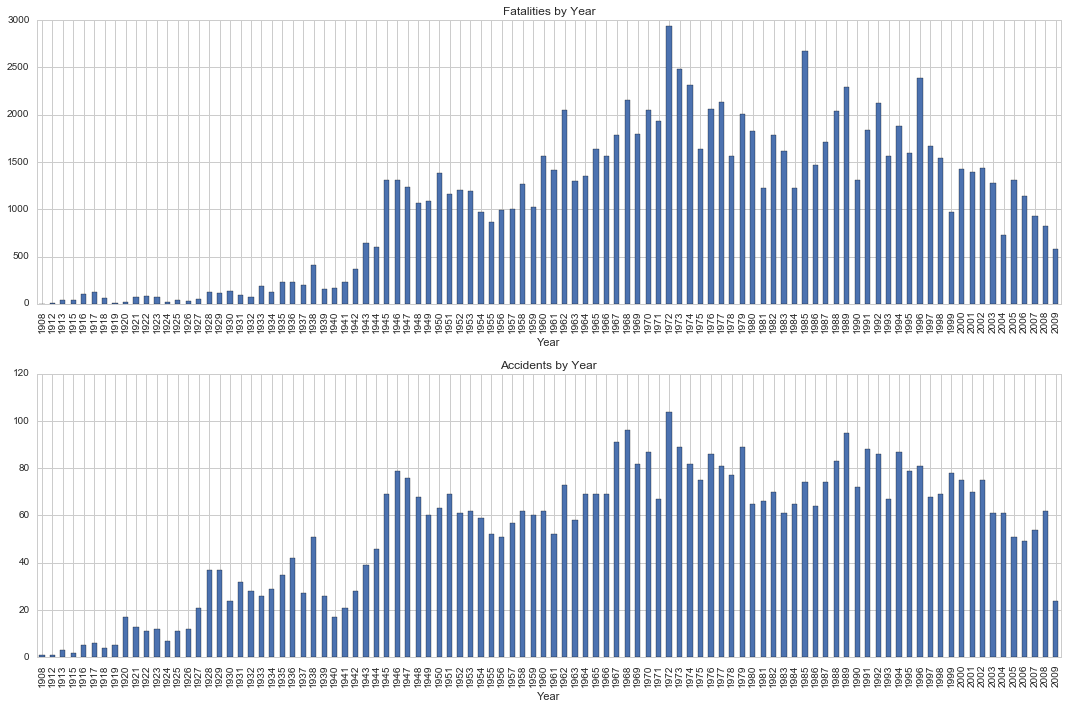

In [3]:
byYear = frame[['Year','Fatalities']].groupby('Year').agg(['sum','count'])

fig_byYear,(ax1,ax2)=plt.subplots(2,1,figsize=(15,10))
byYear['Fatalities','sum'].plot(kind='bar',title='Fatalities by Year',grid=True,ax=ax1,rot=90)
byYear['Fatalities','count'].plot(kind='bar',title='Accidents by Year',grid=True,ax=ax2,rot=90)
plt.tight_layout()

In [ ]:
# 
# What about the fatality rate as a function of year?  Does it get lower over year?
# 

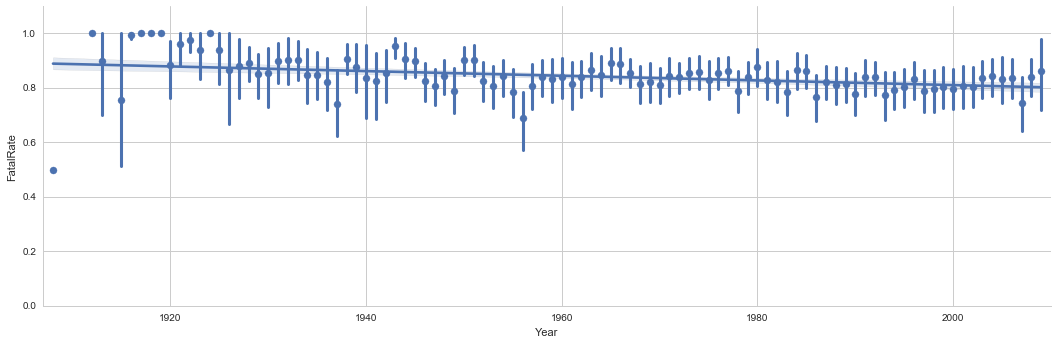

In [4]:
g = sns.lmplot("Year", "FatalRate", data=frame, fit_reg=True, x_estimator=np.mean, 
                size=5, aspect=3, palette="Set2", truncate=True)
g.set(ylim=(0, 1.1))
g.set(xlim=(1907,2010))

In [ ]:
#
# The trend line certainly decreases slightly but this isn't really statisticslly convincing.
# Does this change if we compare large/small aircraft?  
#

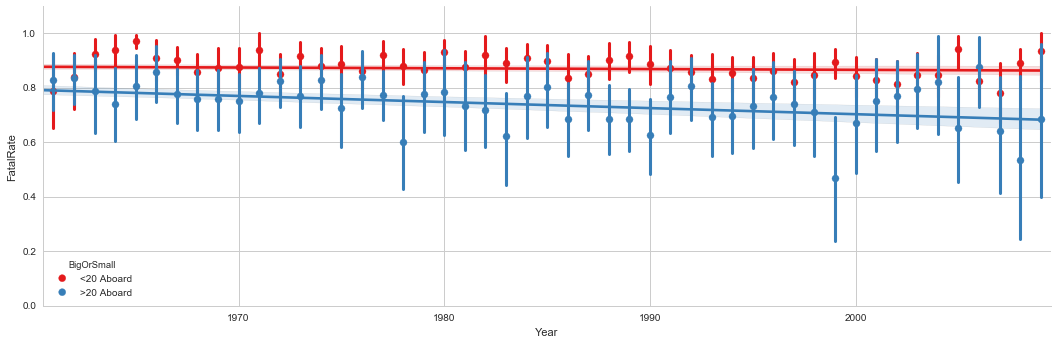

In [5]:
frame['BigOrSmall'] = np.where(frame['Aboard']>20, '>20 Aboard', '<20 Aboard')
frame.head(20)

g8 = sns.lmplot("Year", "FatalRate", data=frame, fit_reg=True, x_estimator=np.mean, 
                size=5, aspect=3, palette="Set1", hue='BigOrSmall', truncate=True, legend_out=False)
g8.set(ylim=(0, 1.1))
g8.set(xlim=(1960.5,2009.5))

In [ ]:
#
# Well there's something we could've guessed - you are more likely to die in the crash of a small plane
# than a large one.
#
# What about by hour?  Is it safer to fly during the day?
#

/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


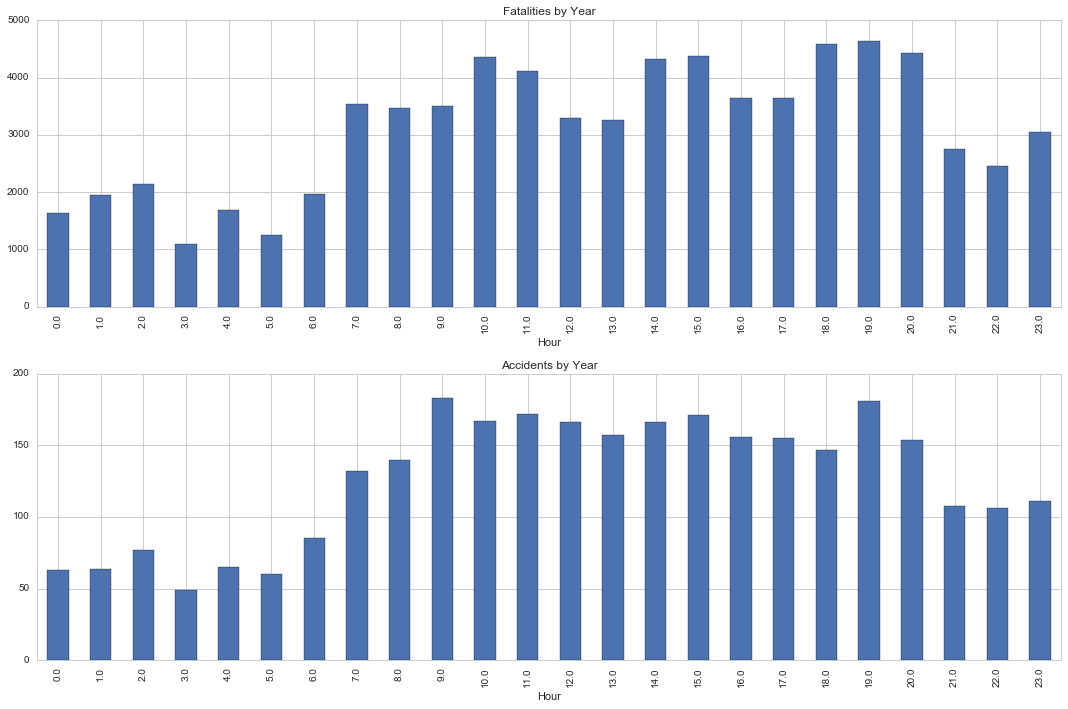

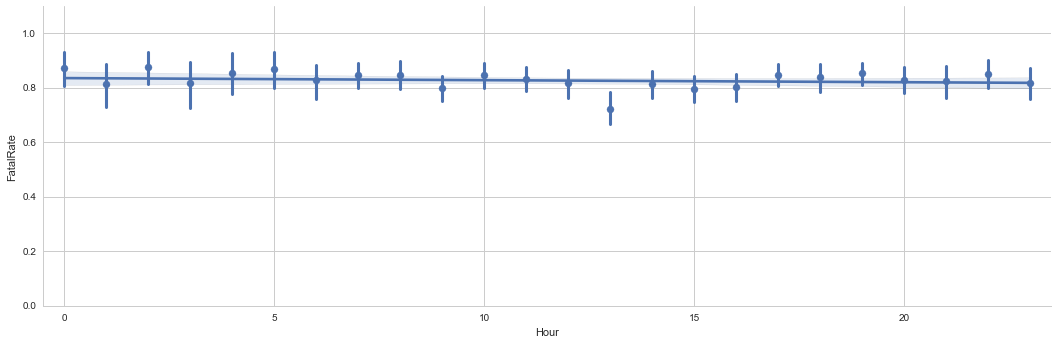

In [6]:
frameNoNAN = frame.dropna(subset=['Time'])  # drop the NaNs
frameNoNAN['Hour'] = frameNoNAN.Time.str[0:2]  #just the hour
sort_frameNoNAN = frameNoNAN.sort_values(by=['Hour'], ascending=True) # sort by hour
sort_frameNoNAN = sort_frameNoNAN.dropna(subset=['Hour'])  # drop the NaNs
sort_frameNoNAN['Hour'] = sort_frameNoNAN['Hour'].convert_objects(convert_numeric=True) #convert from string to float

byHour = sort_frameNoNAN[['Hour','Fatalities']].groupby('Hour').agg(['sum','count'])

fig_byHour,(ax1,ax2)=plt.subplots(2,1,figsize=(15,10))
byHour['Fatalities','sum'].plot(kind='bar',title='Fatalities by Year',grid=True,ax=ax1,rot=90)
byHour['Fatalities','count'].plot(kind='bar',title='Accidents by Year',grid=True,ax=ax2,rot=90)
plt.tight_layout()
g6 = sns.lmplot("Hour", "FatalRate", data=sort_frameNoNAN, fit_reg=True, x_estimator=np.mean, 
                size=5, aspect=3, palette="Blues_d", truncate=True)
g6.set(ylim=(0, 1.1))
g6.set(xlim=(-0.5, 23.5))

In [ ]:
#
#  What about the countries with the most crashes?
#

In [7]:
import collections as col

frame.dropna(subset=['Location'])   # Get rid of rows with no value
frame['Location'] = map(lambda x: str(x), frame['Location'])     # Why were there numbers in the location field?!?
frame['Location'] = map(lambda x: x.upper(), frame['Location'])   # Get rid of any upper/lower ambiguity 
frame['Location'] = frame['Location'].apply(lambda x: x.split(',')[-1])  # Take the name after the last comma (country)

cnt3 = col.Counter()  # Make a counter object...
for word in list(frame['Location']):
    cnt3[word] += 1

print cnt3.most_common(10)

[(' BRAZIL', 184), (' ALASKA', 176), (' RUSSIA', 171), (' COLOMBIA', 146), (' CANADA', 145), (' CALIFORNIA', 143), (' FRANCE', 130), (' ENGLAND', 104), (' INDIA', 97), (' CHINA', 85)]
